<a href="https://colab.research.google.com/github/Jenishk16/oil-shock-impact-on-stocks/blob/main/Oil_impact_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime

In [7]:
oil_ticker = "CL=F"   # WTI Crude Oil Futures (Yahoo Finance symbol)
stocks = ["SPICEJET.BO", "ASIANPAINT.BO", "ONGC.NS", "IOC.BO","INDIGO.BO","SRF.BO"]  # Delta, United, Southwest, American
market_index = "^NSEI"  # S&P 500 for control

In [8]:
start_date = "2015-01-01"
end_date = datetime.today().strftime("%Y-%m-%d")

In [9]:
tickers = stocks + [oil_ticker, market_index]
data = yf.download(tickers, start=start_date, end=end_date)["Close"]

/tmp/ipython-input-1607201878.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start_date, end=end_date)["Close"]
[*********************100%***********************]  8 of 8 completed


In [10]:
pd.set_option("display.max_columns", None)
data.head()

Ticker,ASIANPAINT.BO,CL=F,INDIGO.BO,IOC.BO,ONGC.NS,SPICEJET.BO,SRF.BO,^NSEI
Date,,,,,,,,
2015-01-01,687.086304,NaN,NaN,16.644217,136.226608,18.049999,138.593140,NaN
2015-01-02,709.886902,52.689999,NaN,16.557673,138.265732,17.650000,145.328568,8395.450195
2015-01-05,709.566528,50.040001,NaN,16.715929,139.829742,17.450001,142.665924,8378.400391
2015-01-06,693.404602,47.930000,NaN,16.495853,131.910736,16.200001,136.261307,8127.350098
2015-01-07,707.185669,48.650002,NaN,16.579931,133.850891,16.200001,135.709885,8102.100098


In [6]:
returns = data.pct_change().dropna()
returns.rename(columns={oil_ticker: "Oil", market_index: "Nifty50"}, inplace=True)

/tmp/ipython-input-4246368085.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


In [11]:
print(returns.head())

Ticker      ASIANPAINT.BO       Oil  INDIGO.BO    IOC.BO   ONGC.NS  \
Date                                                                 
2015-11-11       0.000000 -0.028953   0.000000  0.000000  0.000000   
2015-11-12       0.000000 -0.027487   0.000000  0.000000  0.000000   
2015-11-13       0.002380 -0.024192   0.142068  0.022072 -0.032953   
2015-11-16       0.002125  0.024546  -0.015599 -0.013129  0.005461   
2015-11-17       0.006423 -0.025635   0.048096 -0.006465  0.009559   

Ticker      SPICEJET.BO    SRF.BO   Nifty50  
Date                                         
2015-11-11     0.000000  0.000000  0.000000  
2015-11-12     0.000000  0.000000  0.000000  
2015-11-13    -0.001031 -0.032800 -0.002711  
2015-11-16    -0.021672  0.031301  0.005714  
2015-11-17     0.012658  0.014562  0.003965  


In [12]:
rolling_corr = returns[['Oil']].join(returns[stocks]).rolling(90).corr().dropna() #taking returns of oil and joining with returns of stocks on 90 days basic for corr

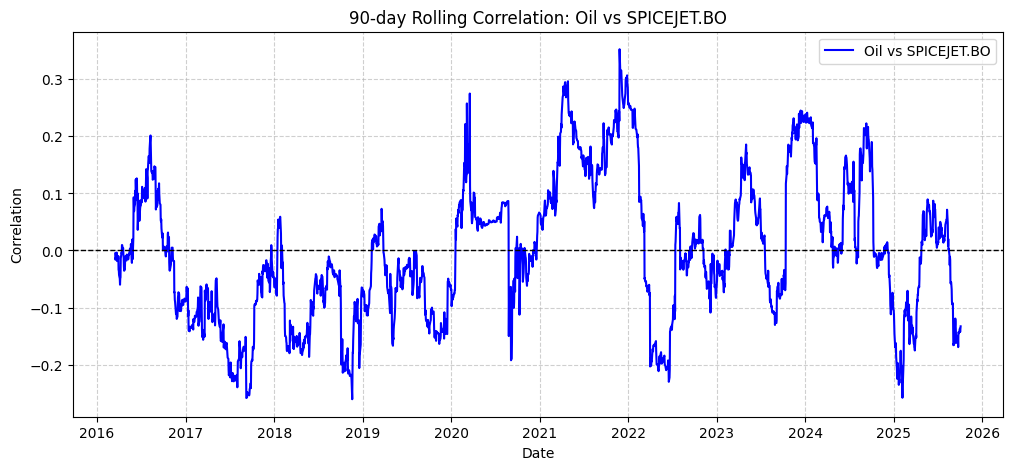

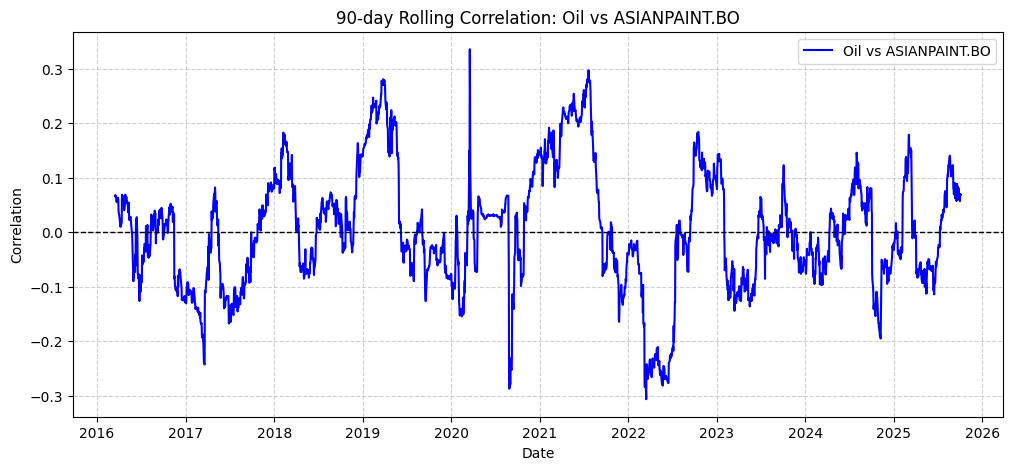

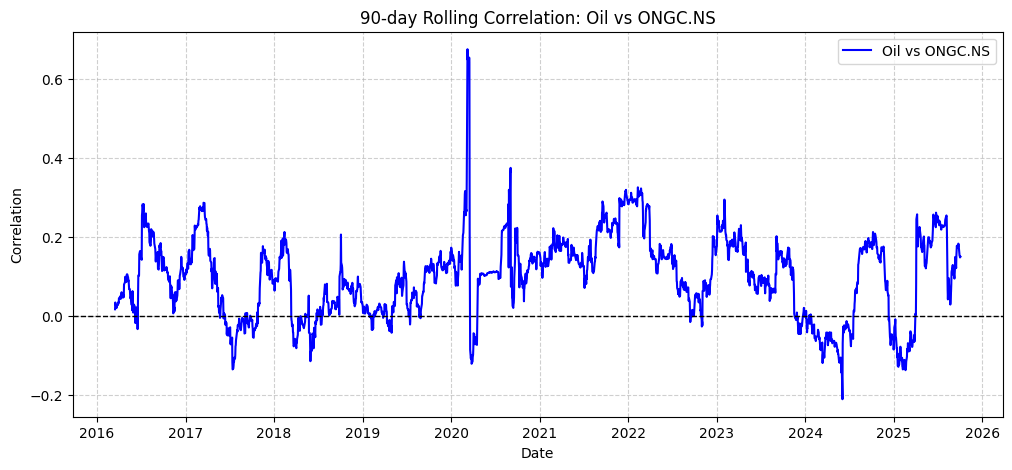

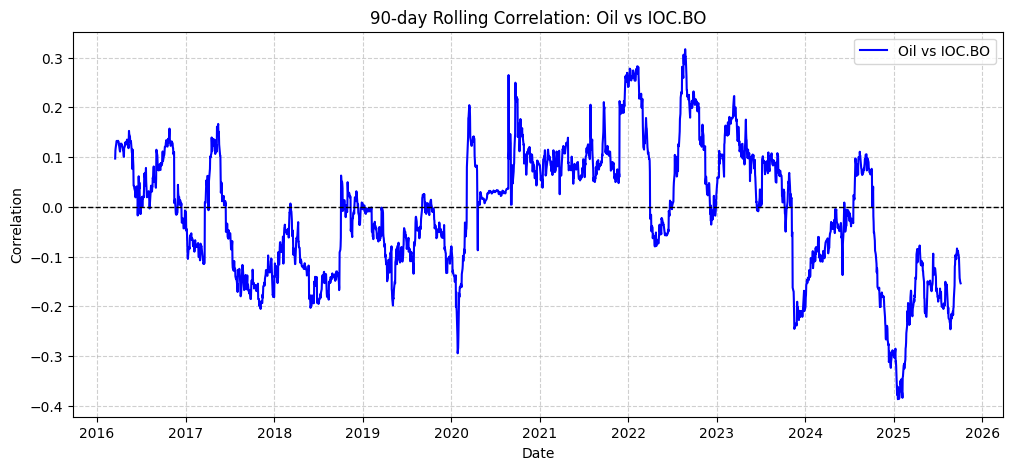

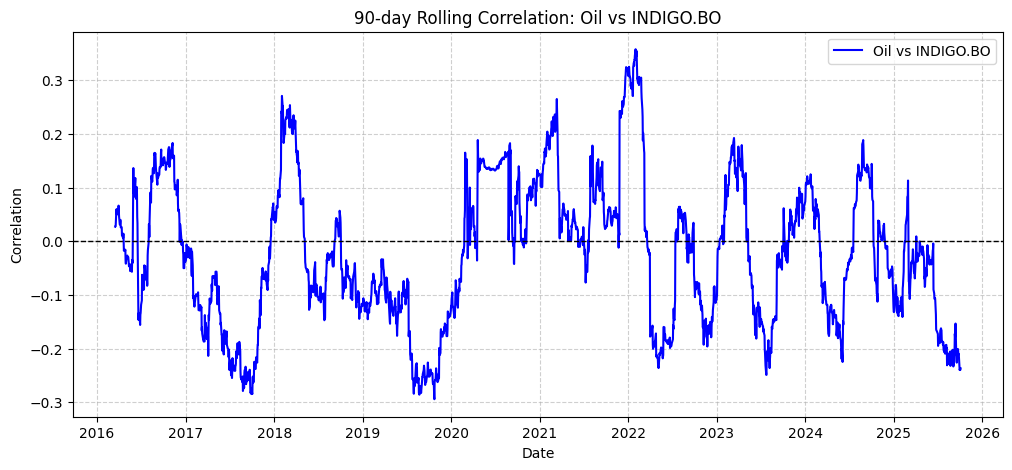

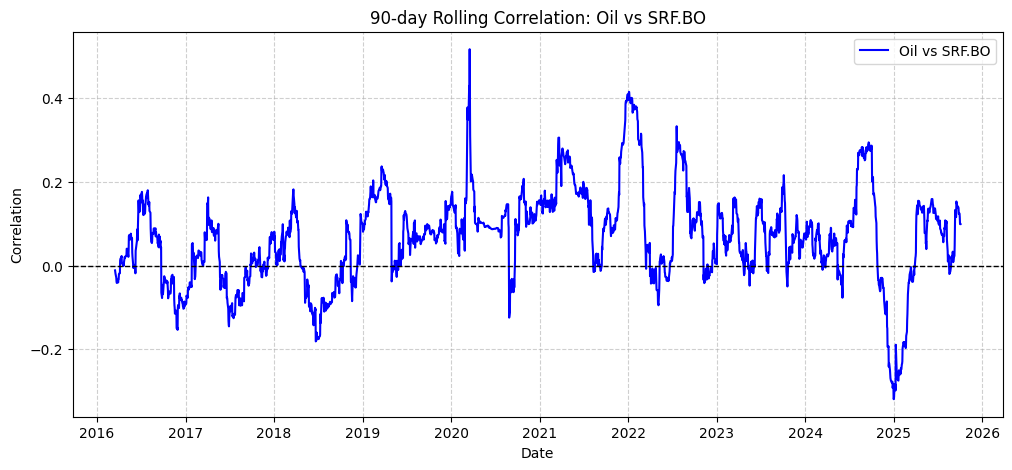

In [13]:
for stock in stocks:
  # Extract Oil vs Stock correlation series
  corr_series = rolling_corr.xs('Oil', level=1)[stock]

  #plot
  plt.figure(figsize=(12, 5))
  plt.plot(corr_series.index, corr_series, label=f'Oil vs {stock}', color='blue')
  plt.axhline(0, color='black', linestyle='--', linewidth=1)  # baseline at 0
  plt.title(f'90-day Rolling Correlation: Oil vs {stock}')
  plt.xlabel('Date')
  plt.ylabel('Correlation')
  plt.legend()
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.show()

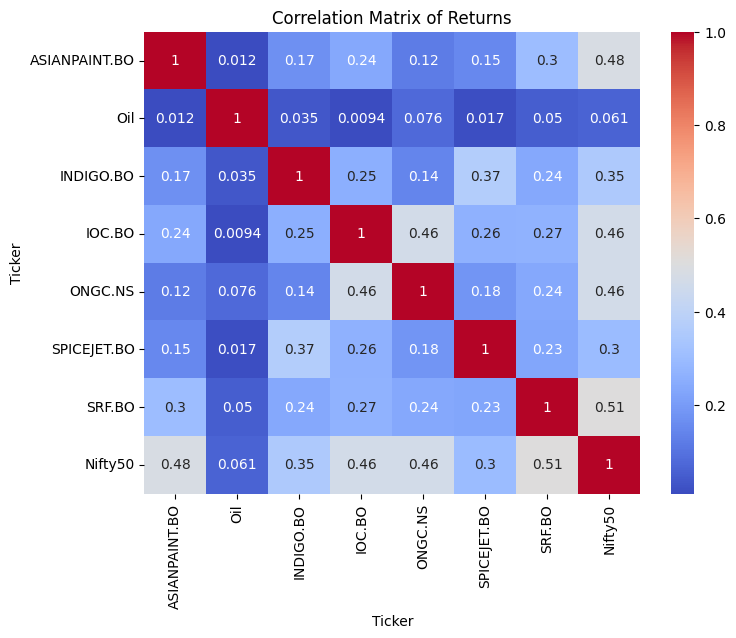

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(returns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Returns")
plt.show()

In [ ]:
X = returns[["Oil", "Nifty50"]] #
X = sm.add_constant(X)
y = returns["IOC.BO"]

In [ ]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 IOC.BO   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     351.4
Date:                Fri, 03 Oct 2025   Prob (F-statistic):          1.36e-135
Time:                        15:22:41   Log-Likelihood:                 6856.3
No. Observations:                2565   AIC:                        -1.371e+04
Df Residuals:                    2562   BIC:                        -1.369e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.464      0.1

In [ ]:
event_dates = [
    "2020-03-09",  # Oil price war / COVID crash
    "2022-03-08"   # Oil spikes during Russia-Ukraine crisis
]

event_window = 10

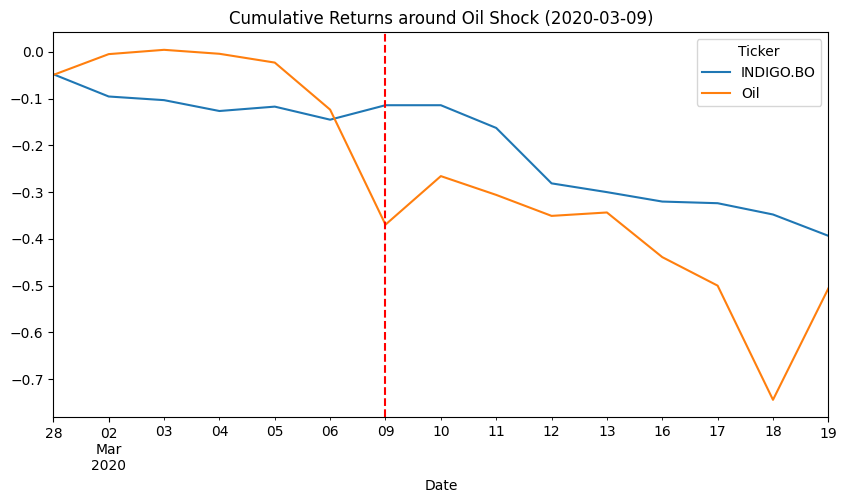

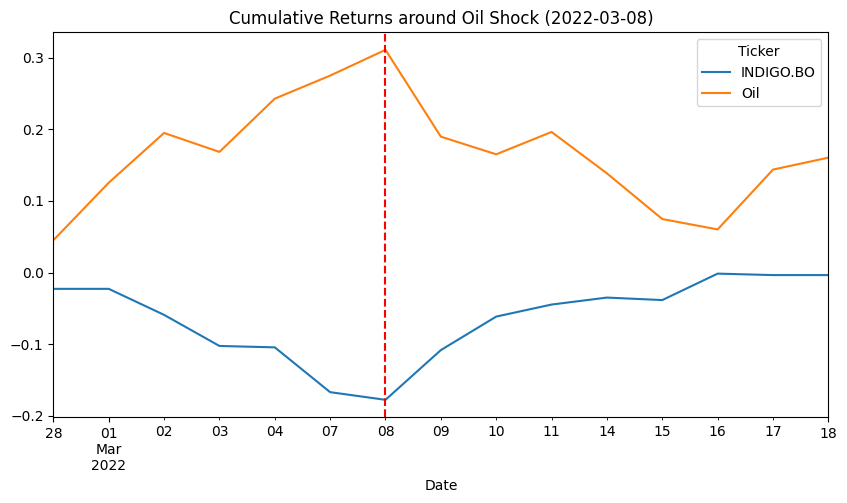

In [ ]:
for event in event_dates:
    event = pd.to_datetime(event)
    window_data = returns.loc[event - pd.Timedelta(days=event_window) :
                              event + pd.Timedelta(days=event_window), ["INDIGO.BO", "Oil"]]
    window_data.cumsum().plot(figsize=(10,5))
    plt.axvline(event, color='red', linestyle='--')
    plt.title(f"Cumulative Returns around Oil Shock ({event.date()})")
    plt.show()

In [ ]:
stock = yf.Ticker("AAPL")

In [ ]:
print("Trailing P/E:", stock.info.get("trailingPE"))

Trailing P/E: 39.077507


In [ ]:
print("Price-to-Book:", stock.info.get("priceToBook"))

Price-to-Book: 58.02979
